# Top tech stocks analysis from US market to decide best stock for your investment based on your risk factor

## 1. Importing packages and datasets

In [6]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

from pandas_datareader.data import DataReader
from datetime import datetime

## 2. Importing datasets from Yahoo reader

In [2]:
# The tech stocks we will use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for stock in tech_list:   
    globals()[stock] = DataReader(stock, 'yahoo', start, end)

## 3. Display data characteristics

In [3]:
company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.tail(10)

,High,Low,Open,Close,Volume,Adj Close,company_name
Date,,,,,,,
2022-04-11,3082.729980,3010.689941,3054.260010,3022.439941,2605600.0,3022.439941,AMAZON
2022-04-12,3101.979980,3007.659912,3073.850098,3015.750000,2758900.0,3015.750000,AMAZON
2022-04-13,3120.500000,2992.000000,3000.370117,3110.820068,2669500.0,3110.820068,AMAZON
2022-04-14,3117.939941,3029.439941,3107.800049,3034.129883,2575200.0,3034.129883,AMAZON
2022-04-18,3080.790039,3005.010010,3030.469971,3055.699951,2325700.0,3055.699951,AMAZON
2022-04-19,3172.979980,3031.010010,3040.590088,3162.310059,2746300.0,3162.310059,AMAZON
2022-04-20,3152.050049,3072.070068,3152.050049,3079.959961,2981500.0,3079.959961,AMAZON
2022-04-21,3134.760010,2951.790039,3094.280029,2965.919922,3198500.0,2965.919922,AMAZON
2022-04-22,2992.300049,2873.949951,2965.000000,2887.000000,3649800.0,2887.000000,AMAZON


## Individual Stocks Description

In [4]:
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,253.000000,253.000000,253.000000,253.000000,2.530000e+02,253.000000
mean,154.599052,151.396047,152.913439,153.070909,8.639492e+07,152.747217
std,16.327162,15.570716,15.979492,15.974984,2.552715e+07,16.153313
min,124.639999,122.250000,123.160004,122.769997,4.100000e+07,122.251923
25%,144.600006,142.029999,143.449997,143.240005,6.871100e+07,142.635559
50%,151.490005,149.009995,150.020004,150.020004,8.054620e+07,149.799149
75%,169.679993,165.500000,167.479996,166.559998,9.867070e+07,166.559998
max,182.940002,179.119995,182.630005,182.009995,1.954327e+08,181.778397


## 4. Visualization of stocks

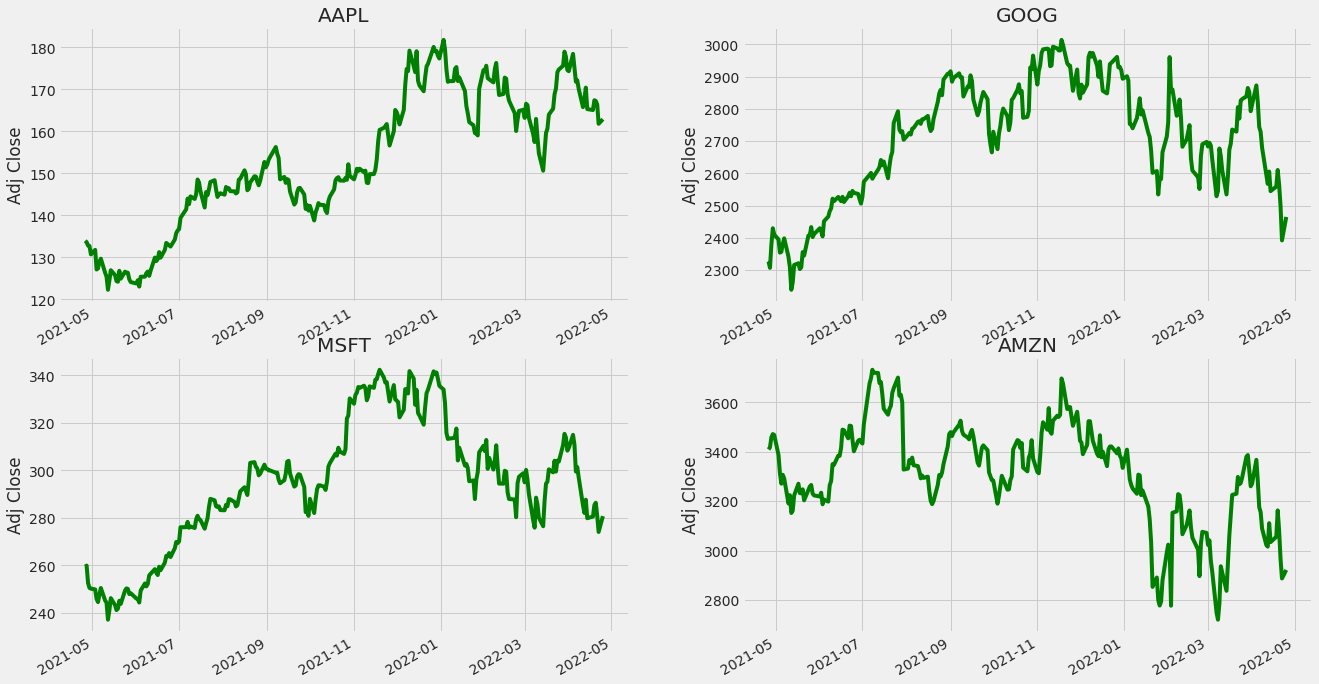

In [8]:
plt.figure(figsize=(20, 8))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot(color='g')
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"{tech_list[i - 1]}")

## 5. Daily stocks exchange

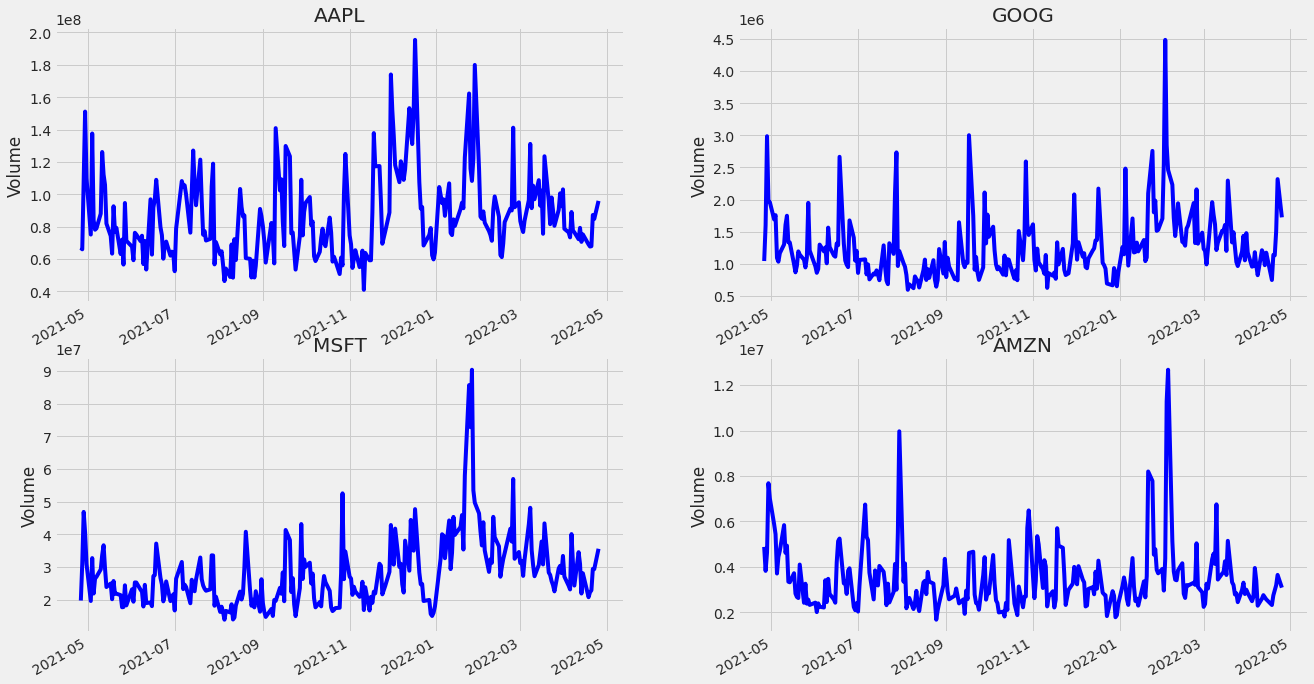

In [9]:
# Plotting the total volume of stock being traded each day
plt.figure(figsize=(20, 8))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot(color='b')
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"{tech_list[i - 1]}")

## 6. Moving Average of different stocks

In [10]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()

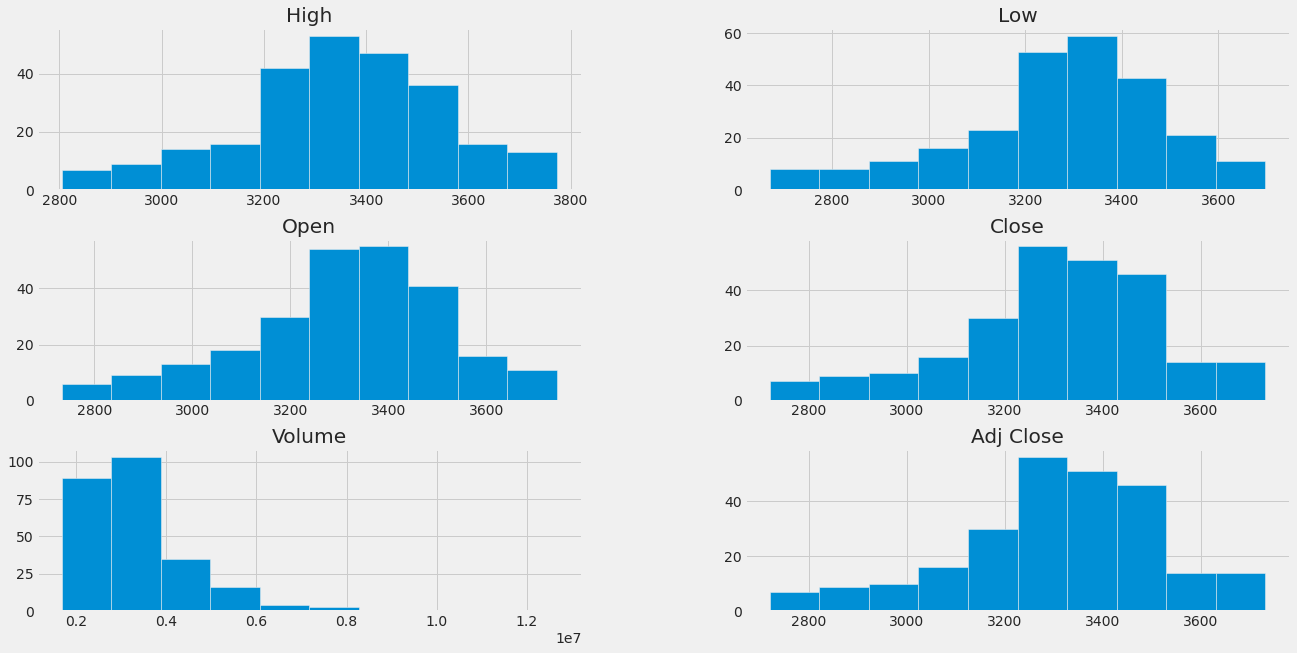

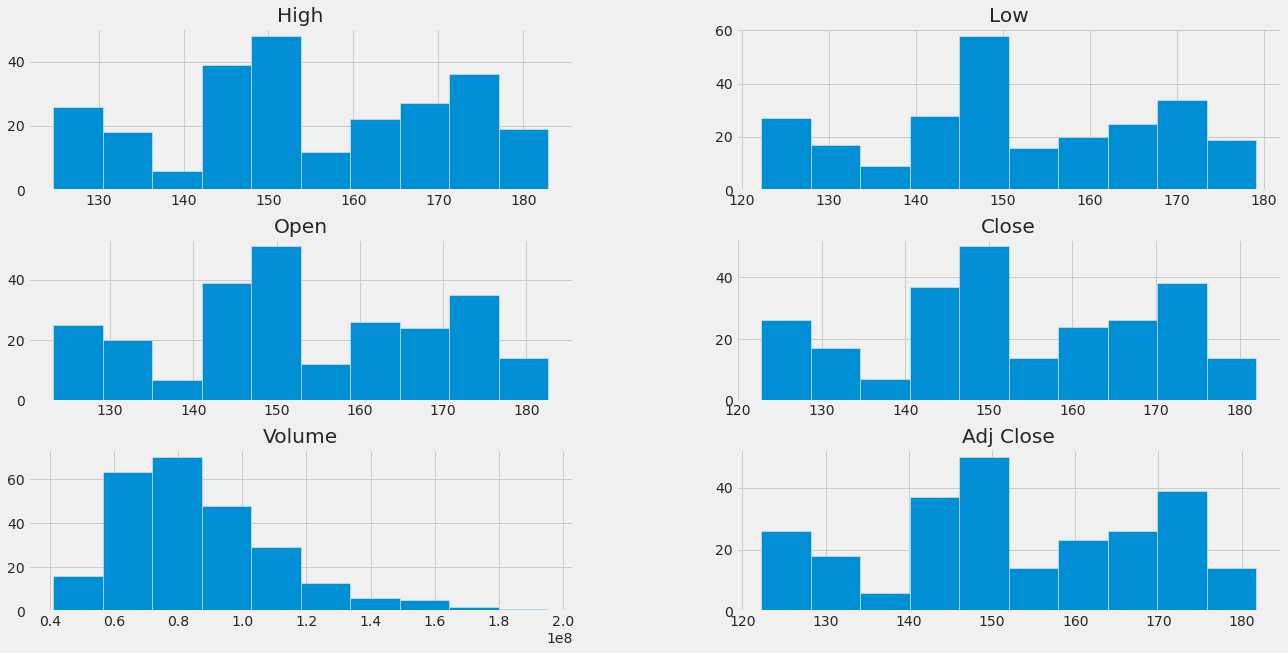

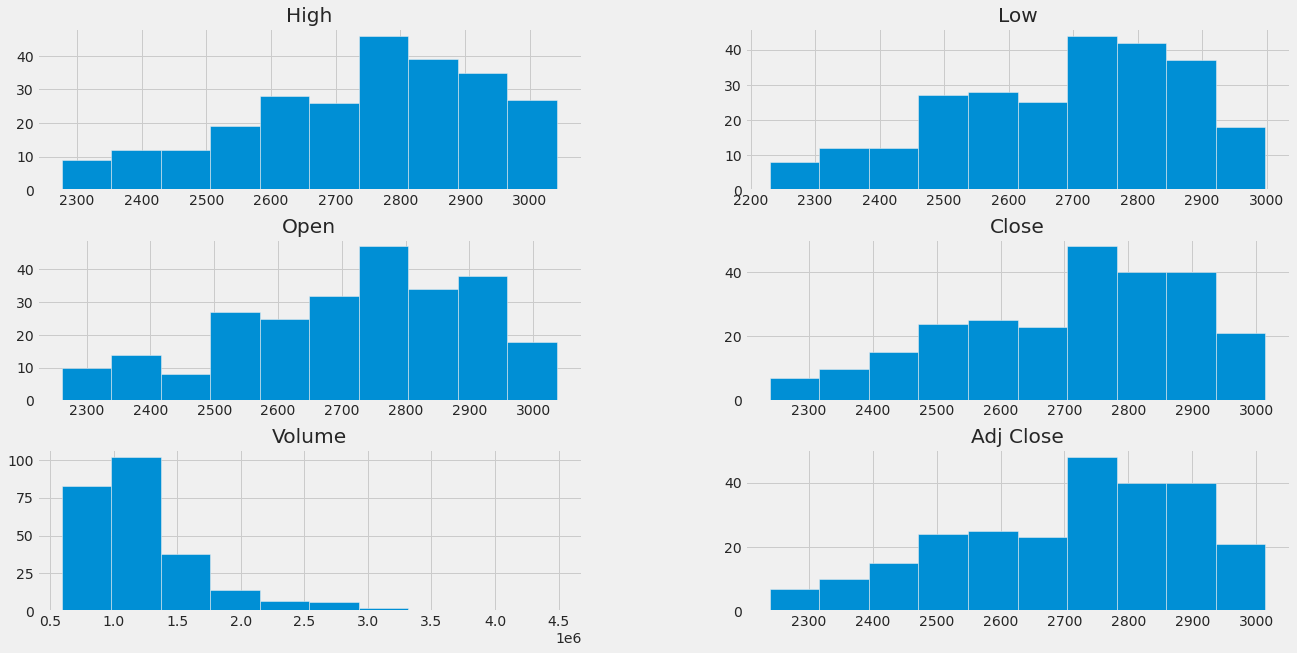

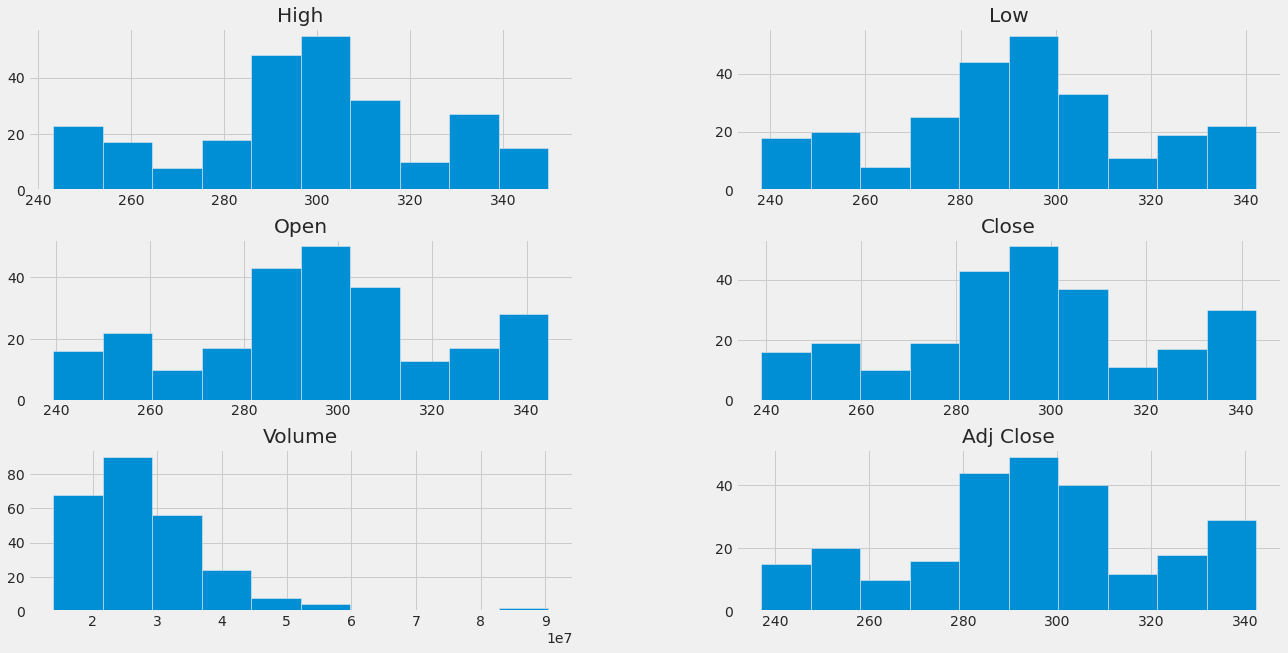

In [11]:
df.groupby("company_name").hist(figsize=(20, 10));

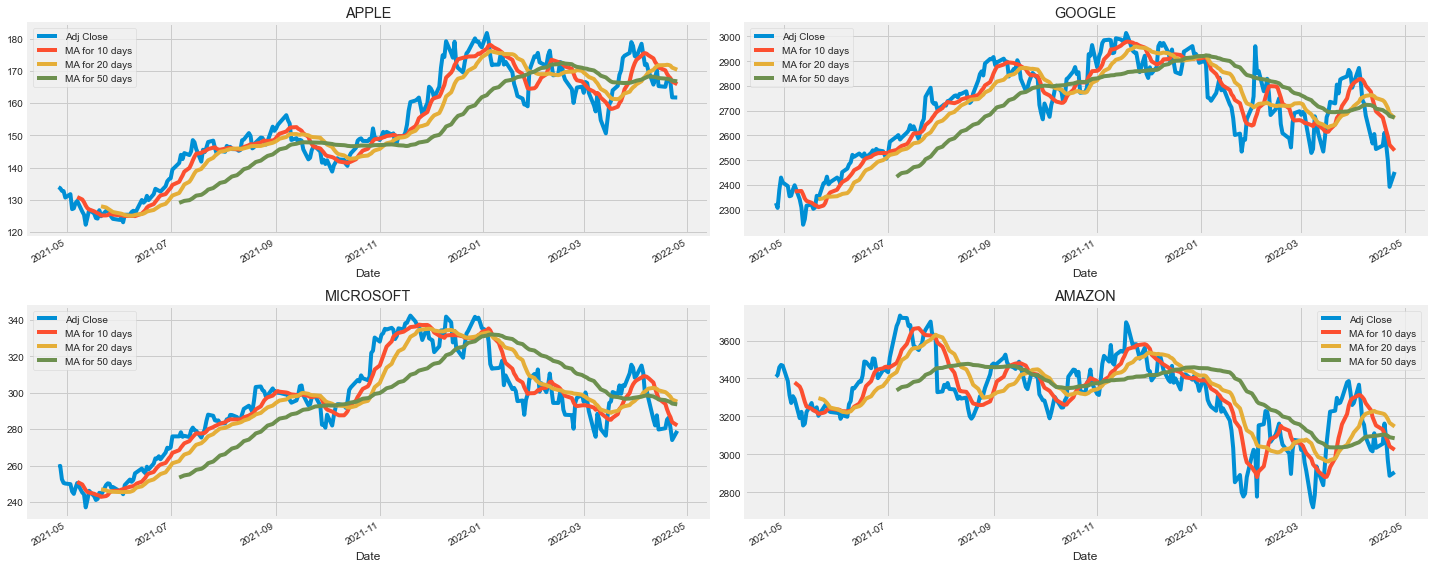

In [12]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(20)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()

## 7. Daily average return of stocks

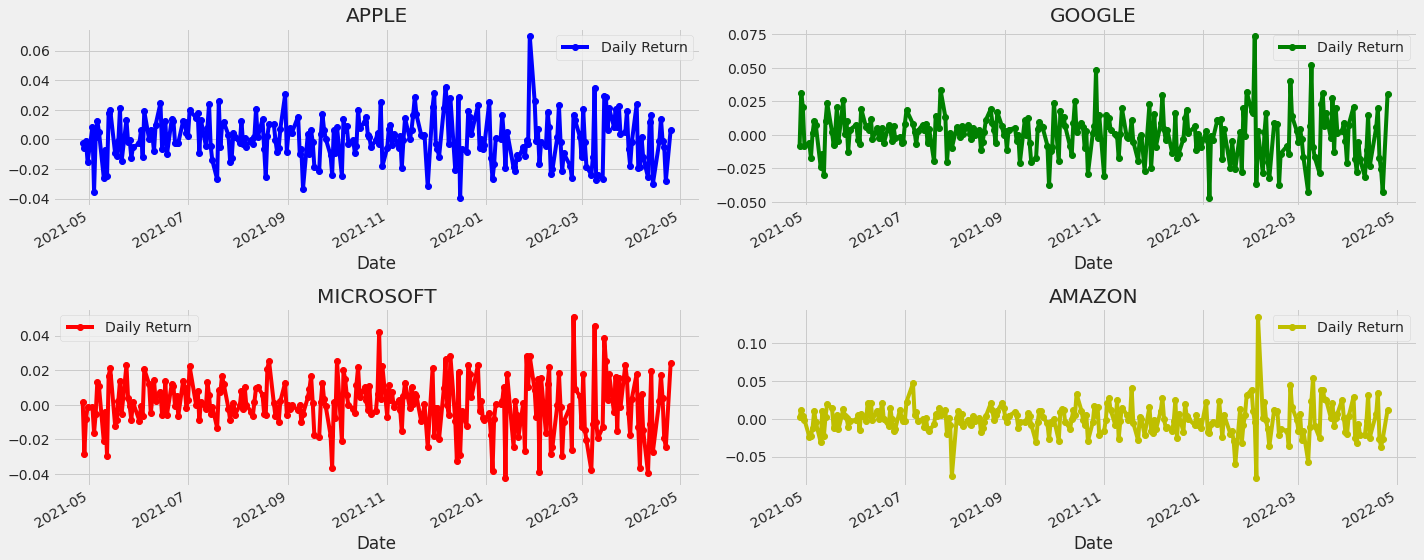

In [12]:
# Finding the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Plotting the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(20)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True,  marker='o',color='b')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True,  marker='o',color='g')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, marker='o',color='r')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True,  marker='o',color='y')
axes[1,1].set_title('AMAZON')

fig.tight_layout()

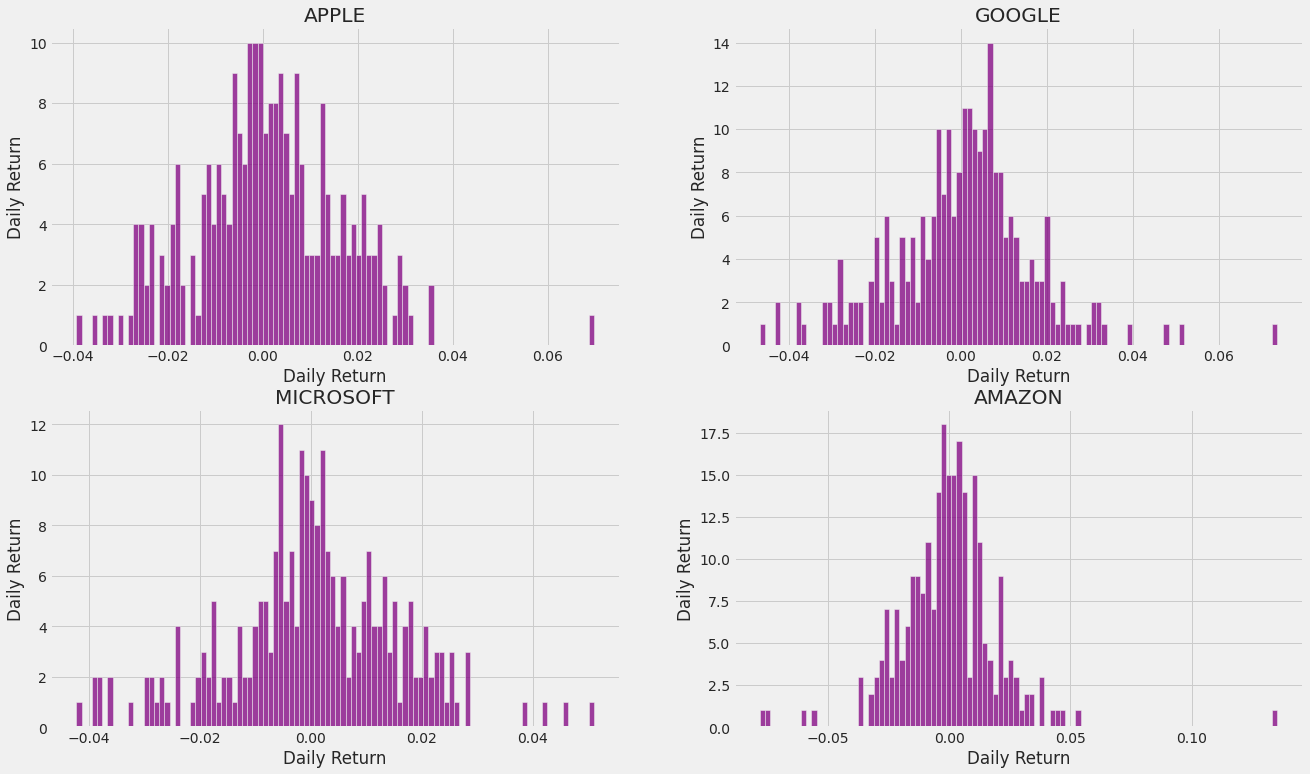

In [13]:
plt.figure(figsize=(20, 12))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    sns.histplot(company['Daily Return'].dropna(), bins=100, color='purple')
    plt.ylabel('Daily Return')
    plt.title(f'{company_name[i - 1]}')

## 8. Finding the correlation between stocks

In [14]:
closing_df = DataReader(tech_list, 'yahoo', start, end)['Adj Close']
closing_df.head() 

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2021-04-26,133.924026,2326.739990,259.436737,3409.000000
2021-04-27,133.595963,2307.120117,259.853394,3417.429932
2021-04-28,132.790756,2379.909912,252.503250,3458.500000
2021-04-29,132.691345,2429.889893,250.469803,3471.310059
2021-04-30,130.683289,2410.120117,250.142487,3467.419922


In [15]:
tech_rets = closing_df.pct_change()
tech_rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2021-04-26,NaN,NaN,NaN,NaN
2021-04-27,-0.002450,-0.008432,0.001606,0.002473
2021-04-28,-0.006027,0.031550,-0.028286,0.012018
2021-04-29,-0.000749,0.021001,-0.008053,0.003704
2021-04-30,-0.015133,-0.008136,-0.001307,-0.001121


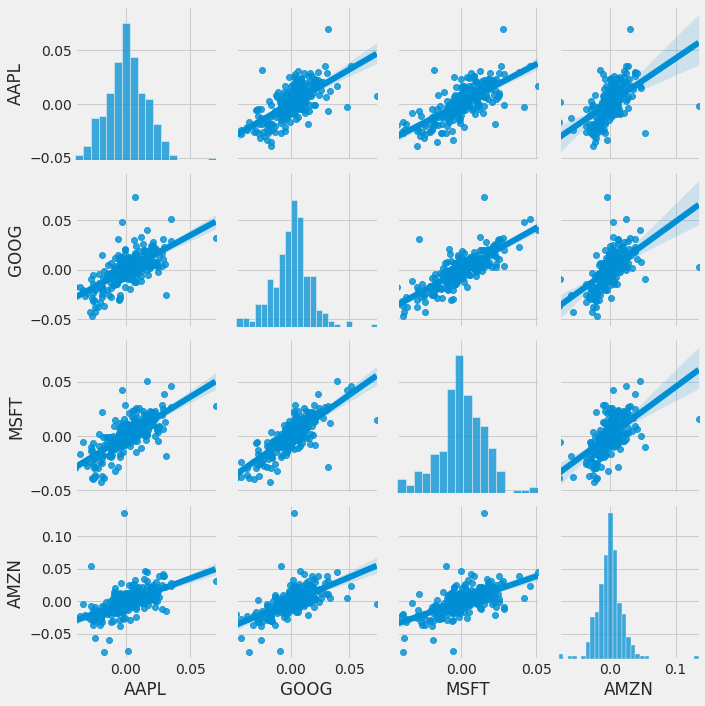

In [16]:
sns.pairplot(tech_rets, kind='reg')

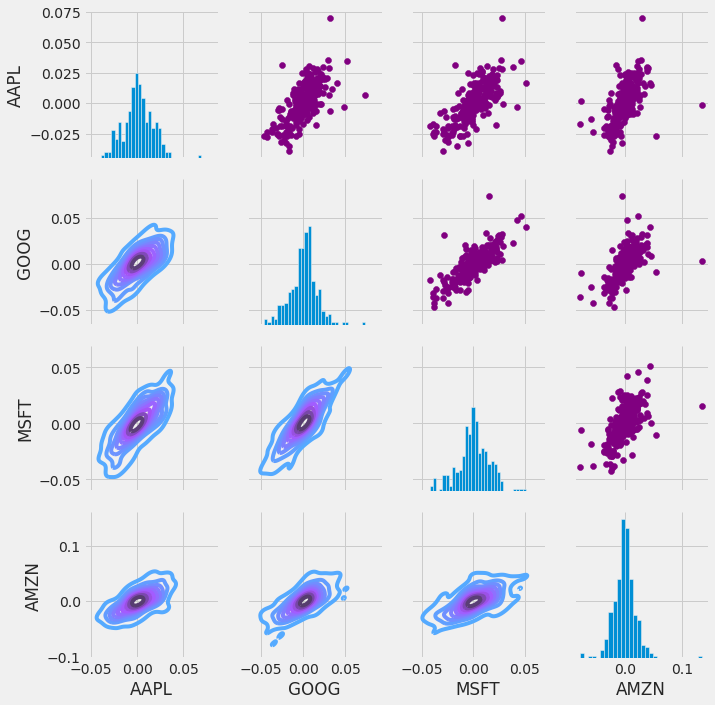

In [17]:
# Set up our figures
return_fig = sns.PairGrid(tech_rets.dropna())
return_fig.map_upper(plt.scatter, color='purple')
return_fig.map_lower(sns.kdeplot, cmap='cool_d')
return_fig.map_diag(plt.hist, bins=30)

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

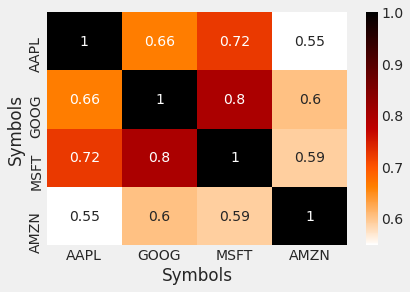

In [18]:
sns.heatmap(tech_rets.corr(), annot=True, cmap='gist_heat_r')

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

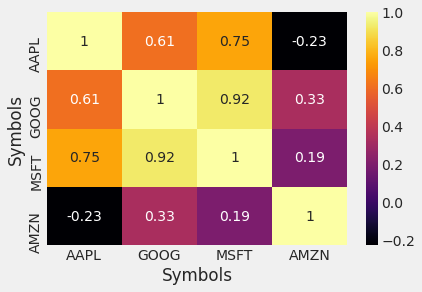

In [19]:
sns.heatmap(closing_df.corr(), annot=True, cmap='inferno')

## 9. Risk on a particular stock

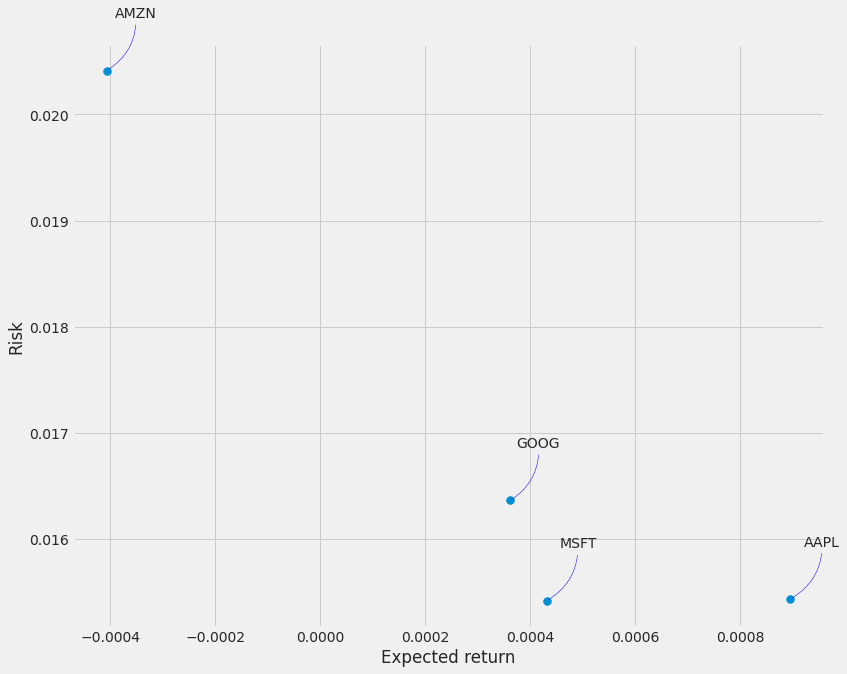

In [20]:
rets = tech_rets.dropna()

area = np.pi*20

plt.figure(figsize=(12, 10))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))